<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
        <li>Question 7: Add the GitHub link or the URL to your assignment in Watson Studio using the share notebook lab instructions.</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [ ]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [5]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.6 MB 9.4 MB/s eta 0:00:01
   -------------- ------------------------- 3.4/9.6 MB 9.6 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.6 MB 9.4 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.6 MB 9.1 MB/s eta 0:00:01
   ------------------------------------- -- 8.9/9.6 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 9.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 6.1.2
    Uninstalling plotly-6.1.2:
      Successfully uninstalled plotly-6.1.2


In [6]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [7]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [8]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [9]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload the screenshot of the results.

In [12]:
import yfinance as yf

# Download Tesla stock data
tesla_data = yf.download('TSLA')

# Create ticker object for Tesla (TSLA)
tesla_ticker = yf.Ticker("TSLA")

# Reset the index of the dataframe
tesla_data_reset = tesla_data.reset_index()

# Display the first 5 rows of the dataframe
print(tesla_data_reset.head())

[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open     Volume
Ticker                 TSLA      TSLA      TSLA      TSLA       TSLA
0      2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1      2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2      2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3      2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4      2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Display the last five rows of the tesla_revenue dataframe using the tail function. 
Upload a screenshot of the results. Make sure you are using the data from the table named Tesla Quarterly Revenue on the website.

In [15]:
# The installation must be carried out first, if not already done
!pip install lxml

   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ------- -------------------------------- 0.8/4.0 MB 5.6 MB/s eta 0:00:01
   -------------------- ------------------- 2.1/4.0 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 7.0 MB/s eta 0:00:00


In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define URL variable and assign the value
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Assign HTML data
response = requests.get(url)
html_data = response.text

# Parse the HTML data
soup = BeautifulSoup(html_data, "html.parser")

# Find the table with Tesla Quarterly Revenue
tables = soup.find_all("table")
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_table = table
        break

# Convert the HTML table to a DataFrame
tesla_revenue = pd.read_html(str(tesla_table))[0]

# Clean the data
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

# Display the last five rows
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


## Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results.

In [17]:
import yfinance as yf
import pandas as pd

# Load GameStop data
gme_data = yf.download('GME')

# Reset the index
gme_data.reset_index(inplace=True)

# Display the last five rows
print(gme_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open    Volume
Ticker                  GME       GME       GME       GME       GME
0      2002-02-13  1.691667  1.693350  1.603296  1.620128  76216000
1      2002-02-14  1.683250  1.716074  1.670626  1.712707  11021600
2      2002-02-15  1.674834  1.687458  1.658002  1.683250   8389600
3      2002-02-19  1.607504  1.666418  1.578047  1.666418   7410400
4      2002-02-20  1.662210  1.662210  1.603296  1.615920   6892800


## Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results. Make sure you are using the data from the table named GameStop Quarterly Revenue on the website.

In [18]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Set URL of the table
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send HTTP request
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Search the right table
tables = soup.find_all("table")
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        revenue_table = table
        break

# Extract data
rows = revenue_table.find_all("tr")
data = []
for row in rows[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        data.append([date, revenue])

# Create DataFrame
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue (in millions USD)"])

# Letzte fünf Zeilen anzeigen
print(gme_revenue.tail())

          Date Revenue (in millions USD)
57  2006-01-31                      1667
58  2005-10-31                       534
59  2005-07-31                       416
60  2005-04-30                       475
61  2005-01-31                       709


## Question 5: Plot Tesla Stock Graph


Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.


In [19]:
!pip install matplotlib

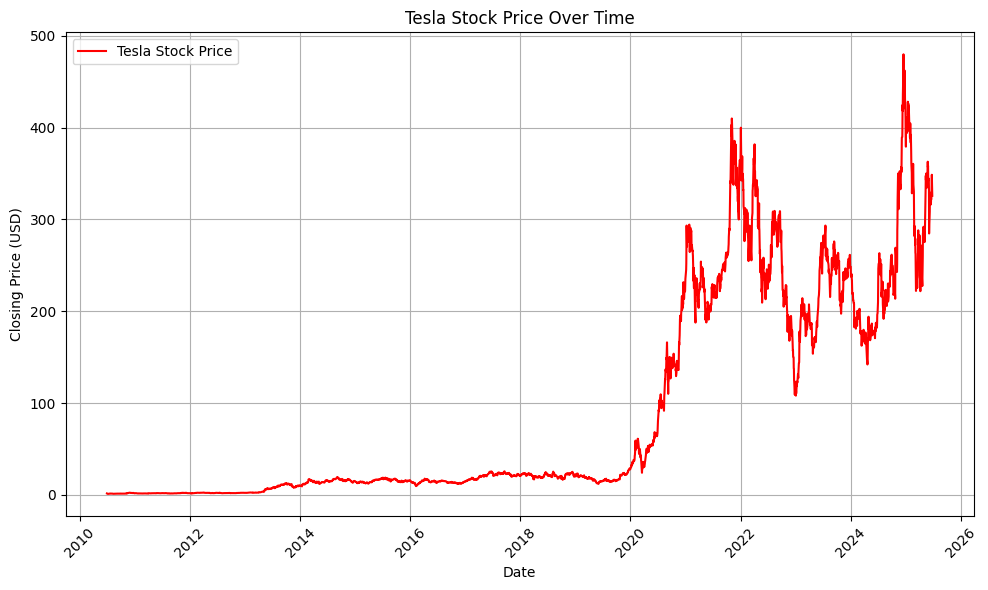

In [20]:
import matplotlib.pyplot as plt

# Reset columns so that date is added
tesla_data.reset_index(inplace=True)

# Format date column
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data = tesla_data.sort_values('Date')

# Define function for creating the graph
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Tesla Stock Price', color='red')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

# Display example graph 
make_graph(tesla_data, 'Tesla Stock Price Over Time')

## Question 6: Plot GameStop Stock Graph


Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

Upload a screenshot of your results.


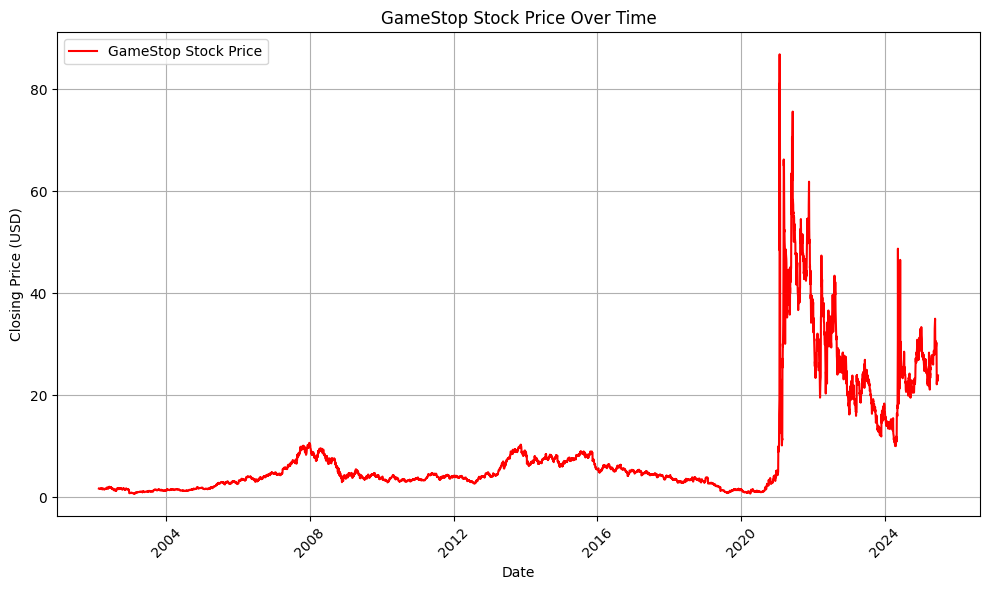

In [21]:
import matplotlib.pyplot as plt

# Reset columns so that date is added
gme_data.reset_index(inplace=True)

# Format date column
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_data = gme_data.sort_values('Date')

# Define function for creating the graph
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='GameStop Stock Price', color='red')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

# Display example graph 
make_graph(gme_data, 'GameStop Stock Price Over Time')

<h2>About the Author>:</h2> 

Florian Nolte


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

```toggle ## Change Log
```
```toggle | Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
```
```toggle | ----------------- | ------- | ------------- | ------------------------- |
```
```toggle | 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
```
```toggle | 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
```
```toggle | 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |
```
